# Python for fun

In [ ]:
# # Install Requirements
# !pip install -r "/content/drive/MyDrive/Ari Folders/Data_Ari/Data_Science/Digital Skola after Fazz/Corporate Training/Astra Honda Motor/For Ari/requirements_colab.txt"

In [1]:
# import library
import pandas as pd
import numpy as np
import os
import glob

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# import machine learning model
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import sys
sys.path.append('/content/drive/MyDrive/Ari Folders/Data_Ari/Data_Science/Digital Skola after Fazz/Corporate Training/Astra Honda Motor/For Ari/Materials')
# import collection_function as cus_viz

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading file
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/refs/heads/main/dataset/Sample-Superstore%20-%20Orders.csv")

display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Cleaning

### Change Data Type

In [4]:
# Mengubah tipe data tanggal
cols_date = ['Order Date', 'Ship Date']
for i in cols_date:
  data[i] = pd.to_datetime(data[i])

### Change Numerical data

In [5]:
# Mengubah tipe data float menjadi integer
cols_integer = ['Sales','Profit']
for i in cols_integer:
  data[i] = data[i].astype('int64')

### Drop Duplicate Data

In [6]:
# Menghapus data yang duplikat
data_copy = data.copy()
data_copy = data_copy.drop_duplicates()

print("Total Rows from Old Data: {}".format(data.shape[0]))
print("Total Rows from New Data: {}".format(data_copy.shape[0]))

Total Rows from Old Data: 9994
Total Rows from New Data: 9994


### Check outlier data

Original data shape: (9994, 21)
Cleaned data shape: (8825, 21)


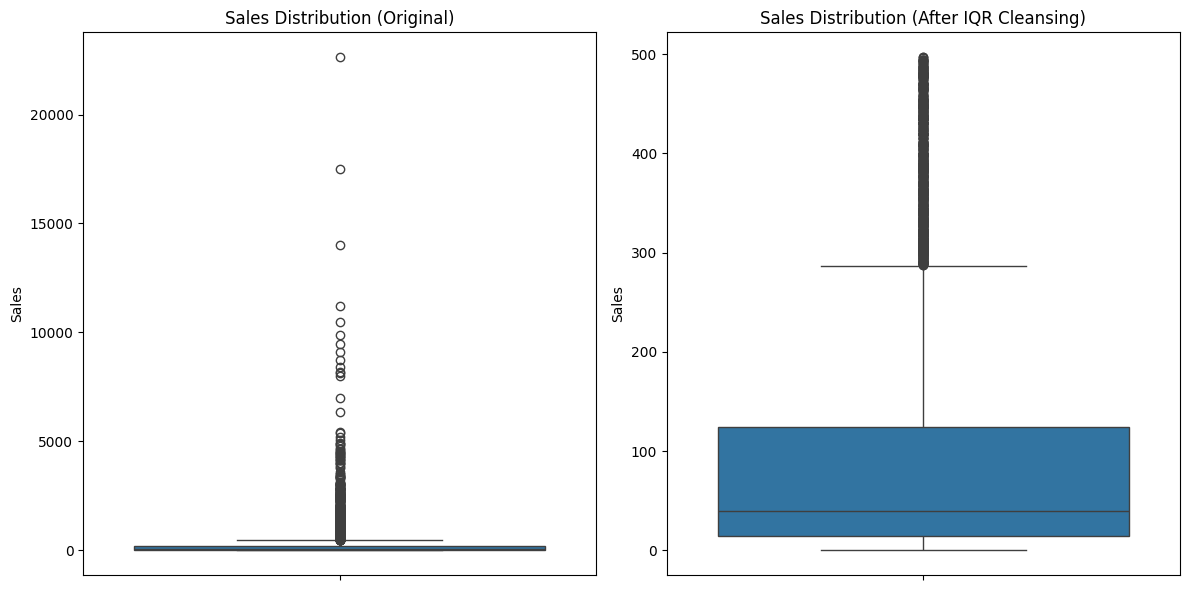

In [7]:
# prompt: Implementation of Outlier Cleansing using IQR for Sales column

import matplotlib.pyplot as plt
Q1 = data_copy['Sales'].quantile(0.25)
Q3 = data_copy['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_cleaned = data_copy[(data_copy['Sales'] >= lower_bound) & (data_copy['Sales'] <= upper_bound)]

print(f"Original data shape: {data_copy.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

# Visualize the distribution before and after outlier removal
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data_copy['Sales'])
plt.title('Sales Distribution (Original)')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['Sales'])
plt.title('Sales Distribution (After IQR Cleansing)')

plt.tight_layout()
plt.show()

### Data Encoding

In [22]:
dataset = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Human%20Capital.csv")
display(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


None

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [24]:
dataset_new = dataset.copy()
dataset_new2 = dataset.copy()

#### Label Encoding

In [14]:
# prompt: Implement label encoding from dataset variable

for col in dataset_new.select_dtypes(include='object').columns:
  le = LabelEncoder()
  dataset_new[col] = le.fit_transform(dataset_new[col])

display(dataset_new.head())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73.0,0


#### One-hot Encoding

In [18]:
# prompt: Implement one-hot encoding from dataset variable

cols_to_onehot = ['department', 'region', 'education', 'gender'] # Replace with actual categorical columns

dataset_new2 = pd.get_dummies(dataset_new2, columns=cols_to_onehot, drop_first=True) # drop_first=True avoids multicollinearity

display(dataset_new2.head())

,employee_id,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Finance,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m
0,65438,sourcing,1,35,5.0,8,0,49.0,0,False,...,False,False,False,False,True,False,False,False,True,False
1,65141,other,1,30,5.0,4,0,60.0,0,False,...,False,False,False,False,False,False,False,False,False,True
2,7513,sourcing,1,34,3.0,7,0,50.0,0,False,...,False,False,False,False,False,False,False,False,False,True
3,2542,other,2,39,1.0,10,0,50.0,0,False,...,False,False,False,False,False,False,False,False,False,True
4,48945,other,1,45,3.0,2,0,73.0,0,False,...,False,False,False,False,False,False,False,False,False,True


### Scaling & Normalization

In [25]:
# prompt: Implement scaling for pre-processing data from dataset variable

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical columns for scaling
numerical_cols = dataset_new.select_dtypes(include=['int64', 'float64']).columns

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler
dataset_minmax_scaled = dataset_new.copy()
dataset_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(dataset_minmax_scaled[numerical_cols])

print("MinMax Scaled Data:")
display(dataset_minmax_scaled.head())

MinMax Scaled Data:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,0.835754,Sales & Marketing,region_7,Master's & above,f,sourcing,0.000000,0.375,1.0,0.194444,0.0,0.166667,0.0
1,0.831960,Operations,region_22,Bachelor's,m,other,0.000000,0.250,1.0,0.083333,0.0,0.350000,0.0
2,0.095942,Sales & Marketing,region_19,Bachelor's,m,sourcing,0.000000,0.350,0.5,0.166667,0.0,0.183333,0.0
3,0.032453,Sales & Marketing,region_23,Bachelor's,m,other,0.111111,0.475,0.0,0.250000,0.0,0.183333,0.0
4,0.625107,Technology,region_26,Bachelor's,m,other,0.000000,0.625,0.5,0.027778,0.0,0.566667,0.0


In [21]:
# Apply StandardScaler
dataset_standard_scaled = dataset_new.copy()
dataset_standard_scaled[numerical_cols] = standard_scaler.fit_transform(dataset_standard_scaled[numerical_cols])

print("\nStandard Scaled Data:")
display(dataset_standard_scaled.head())


Standard Scaled Data:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,1.161858,0.808933,1.776526,1.294786,-1.536223,1.154111,-0.415276,0.025598,1.326008,0.500460,-0.154018,-1.088040,-0.305122
1,1.148709,-0.388183,-0.163034,-0.683763,0.650947,-0.885239,-0.415276,-0.627135,1.326008,-0.437395,-0.154018,-0.274538,-0.305122
2,-1.402741,0.808933,-0.619401,-0.683763,0.650947,1.154111,-0.415276,-0.104948,-0.261318,0.265996,-0.154018,-1.014085,-0.305122
3,-1.622829,0.808933,-0.048942,-0.683763,0.650947,-0.885239,1.226063,0.547785,-1.848645,0.969387,-0.154018,-1.014085,-0.305122
4,0.431639,1.207972,0.293333,-0.683763,0.650947,-0.885239,-0.415276,1.331064,-0.261318,-0.906322,-0.154018,0.686874,-0.305122
